# KNN Algorithm

Training Algorithm:
1. Store all the data

Prediction Algorithm:
1. Calculate the distance from x to all points in your data
2. Sort the points in your data by increasing distance from x
3. Predict the majority label of the "k" closest points

Pros:
1. Very Simple,
2. Training is trivial,
3. Works with any number of classes,
4. Easy to add more data,
5. Few parameters:
* K
* Distance Metric

Cons:
1. High prediction cost (worse for large data sets)
2. Not good with high dimentional data
3. categorical Features don't work well

# Get Data

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
df = pd.read_csv('Classified Data', index_col = 0)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [81]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standarized the variables

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
df_train= df.drop("TARGET CLASS", axis=1)

In [85]:
scaler.fit(df_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
df_features = scaler.transform(df_train)

In [87]:
df_new = pd.DataFrame(df_features,columns = df.columns[:-1])

In [88]:
df_new.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Data

In [89]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test,y_train,y_test = train_test_split(df_new, df['TARGET CLASS'],test_size=0.30, random_state = 101)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
Knn_model = KNeighborsClassifier(n_neighbors=1)

In [114]:
Knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [115]:
pred = Knn_model.predict(X_test)

# Predictions and Evaluations

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [118]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



# Choosing K value

In [119]:
error_rate = []

In [120]:
for i in range (1,40):
    
    Knn_model = KNeighborsClassifier(n_neighbors=i)
    Knn_model.fit(X_train, y_train)
    pred_i = Knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [121]:
len(error_rate)

39

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

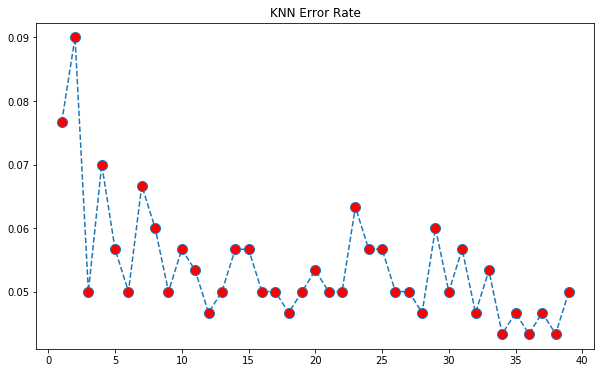

In [122]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,linestyle = "dashed", marker= "o", markerfacecolor = "red",markersize=10)
plt.title('KNN Error Rate')
plt.x_label('K')
plt.y_label('Error Rate')

In [123]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[151   8]
 [ 15 126]]


             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [127]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[153   6]
 [  9 132]]


             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300

